## ML Drug Discovery

### Load data

In [1]:
import pandas as pd

df = pd.read_csv('RA_drugs_solubility_dataset.csv')
df

,Molecule,Canonical SMILES,MolLogP,MolWt,RotatableBonds,AromaticProportion,LogS
0,Molecule 1,OC(=O)c1ccc(cc1)CNc1nc(N)c2c(n1)nc([nH]2)C,1.55382,298.30,4,0.681818,-2.87
1,Molecule 2,OCCN(CCCC(Nc1ccc2c(c1)[nH]cc2C(=Cc1ccccc1)c1cc...,7.30500,502.09,12,0.583333,-7.43
2,Molecule 3,OCC(=O)C1(O)CCC2C1(C)CCC1C2CCC2=CC(=O)CCC12C,2.81080,346.46,2,0.000000,-3.44
3,Molecule 4,O=C(c1c(C)n(n(c1=O)c1ccccn1)C)Nc1ccccc1,2.13172,308.33,4,0.739130,-3.48
4,Molecule 5,Cc1ccc(cc1)c1cc(nn1c1ccc(cc1)C(F)(F)F)C(F)(F)F,5.88532,370.29,4,0.653846,-5.96
...,...,...,...,...,...,...,...
207,Molecule 208,CCCN(C(=O)C(NC(=O)c1ccccc1)CCC(=O)OCCCN1CCN(CC...,6.16422,844.43,26,0.350000,-8.22
208,Molecule 209,OC(=O)C(c1ccc2c(c1)CC(=O)c1c(S2)cccc1)C,3.76470,298.36,2,0.571429,-4.17
209,Molecule 210,OC(=O)C(c1ccc(cc1)CC1CCCC1=O)C,2.78640,246.30,4,0.333333,-2.87
210,Molecule 211,O[C@@H]1C[C@H](N(C1)C(=O)C)C(=O)O,-0.94730,173.17,2,0.000000,-0.07


### Data Preparation
-Data separation as X and Y

In [4]:
y = df['LogS']
y

0     -2.87
1     -7.43
2     -3.44
3     -3.48
4     -5.96
       ... 
207   -8.22
208   -4.17
209   -2.87
210   -0.07
211   -2.64
Name: LogS, Length: 212, dtype: float64

### Data Splitting

In [15]:
from sklearn.impute import SimpleImputer

# Feature matrix
X = df[["MolLogP", "MolWt", "RotatableBonds", "AromaticProportion"]]
y = df["LogS"]

# Imputer to fill NaNs with column mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R²:", lr.score(X_test, y_test))


R²: 0.9410281799663456


## Model Building
### Linear_Regression
#### Training the model

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Applying the model to make a prediction

In [20]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [21]:
y_lr_train_pred

array([-3.44146535, -4.54399726, -3.11615487, -3.33519977, -3.69475028,
       -4.00937897, -2.11956288, -3.58142824, -3.75266177, -6.43683   ,
       -2.11956288, -2.11956288, -4.91173035, -3.09401061, -3.29606395,
       -3.29606395, -3.52770054, -3.95189433, -3.29606395, -3.27423417,
       -3.67761841, -3.70191314, -3.29606395, -4.68205494, -1.01994885,
       -2.11956288, -4.78084662, -2.11956288, -3.29606395, -3.19592528,
       -2.44973895, -3.81965995, -3.27423417, -4.2318644 , -9.29181028,
       -6.06191157, -2.77120642, -2.11956288, -3.91258972, -3.33519977,
       -3.63122551, -3.19592528, -3.97534883, -4.47751908, -3.83594193,
       -3.58142824, -3.33519977, -2.11956288, -0.84893014, -4.10687365,
       -4.83649077, -2.77120642, -4.39909501, -2.11956288, -6.17847778,
       -3.29606395, -2.77120642, -4.51537404, -4.37949006, -2.11956288,
       -3.60699828, -4.66450918, -3.47801622, -7.30655234, -3.19592528,
       -4.00937897, -4.07640979, -2.91480306, -5.96465276, -4.84

In [22]:
y_lr_test_pred

array([-2.11956288, -4.0375624 , -4.766002  , -2.77120642, -3.33519977,
       -3.21351975, -3.40152888, -5.35234813, -5.0068432 , -3.69169396,
       -3.46823624, -3.74882291, -4.37949006, -3.11615487, -3.29606395,
       -3.14852124, -4.99639775, -3.62372862, -0.43680457, -3.45352114,
       -3.45914783, -3.29606395, -4.51196267, -8.17151171, -4.58989023,
       -4.46810377, -4.78084662, -4.71434005, -2.06436638,  0.17689609,
       -4.01877616, -3.63122551, -3.39871192, -3.45352114, -4.78084662,
       -3.04795407, -0.80544932, -7.32197882, -2.00095369, -3.33519977,
       -6.22370318, -3.32156293, -3.2138036 ])

### Evaluate model performance

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [24]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.1693961330689784
LR R2 (Train):  0.9101346954443024
LR MSE (Test):  0.14577129057142119
LR R2 (Test):  0.9410281799663456


In [25]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [26]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.169396,0.910135,0.145771,0.941028


## Random Forest
### Training the model

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Applying the model to make a prediction

In [28]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### Evaluate model performance

In [29]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [30]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.323435,0.828417,0.61323,0.751918


## Model comparison

In [31]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.169396,0.910135,0.145771,0.941028
1,Random forest,0.323435,0.828417,0.61323,0.751918


## Data visualization of prediction results

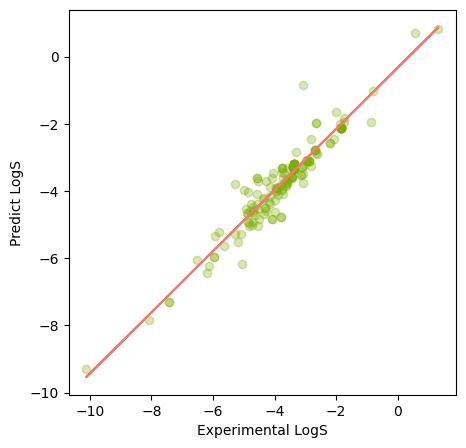

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')
plt.savefig('logS.png')
plt.savefig('logS.pdf')
plt.show()